# Exploratory Data Analysis on Netflix

### Conducted an exploratory data analysis (EDA) of Netflix's content dataset using Python and libraries such as Pandas, NumPy, Matplotlib, Plotly, and TextBlob. Analyzed trends in content production over the years and performed sentiment analysis on show descriptions. Utilized visualizations, including line and bar charts, to illustrate content ratings and sentiment distribution. Findings revealed a consistent prevalence of positive sentiment in the content, exceeding neutral and negative categories since 2010, providing insights into Netflix's content strategies.

In [53]:
# Import Libaries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from textblob import TextBlob 

In [54]:
#loading dataset
netflix_data=pd.read_csv('netflix_data/netflix_titles.csv')

In [55]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [56]:
netflix_data.shape

(8807, 12)

In [57]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [58]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [59]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

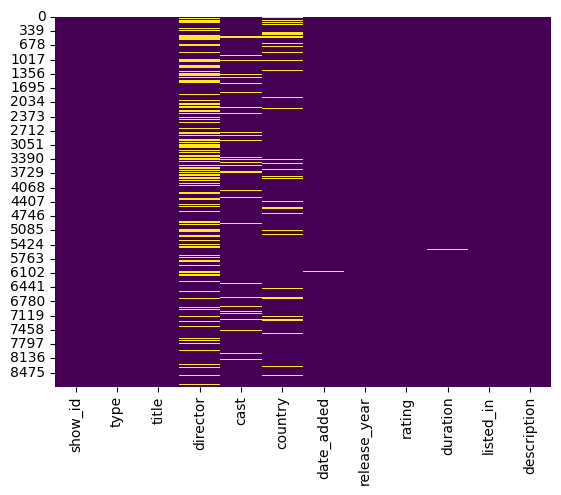

In [60]:
# visualization for missing columns
sns.heatmap(netflix_data.isnull(), cbar=False, cmap='viridis')
plt.show()

## Distribution of Content:

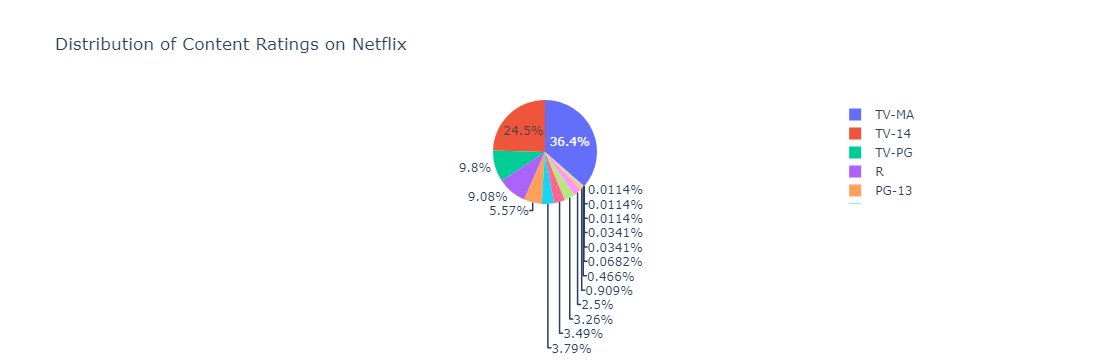

In [61]:
# Group the data by 'rating' and count the number of occurrences for each rating
z = netflix_data.groupby(['rating']).size().reset_index(name='counts')

# Create a pie chart using Plotly Express
pieChart = px.pie(z, values='counts', names='rating',
                  title='Distribution of Content Ratings on Netflix')

# Display the pie chart
pieChart.show()

In [62]:
z

,rating,counts
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


#### The pie chart reveals that a significant portion of Netflix's content is labeled as "TV-MA," indicating that most of the available shows and movies are geared toward mature and adult audiences.

## Top 5 Directors:

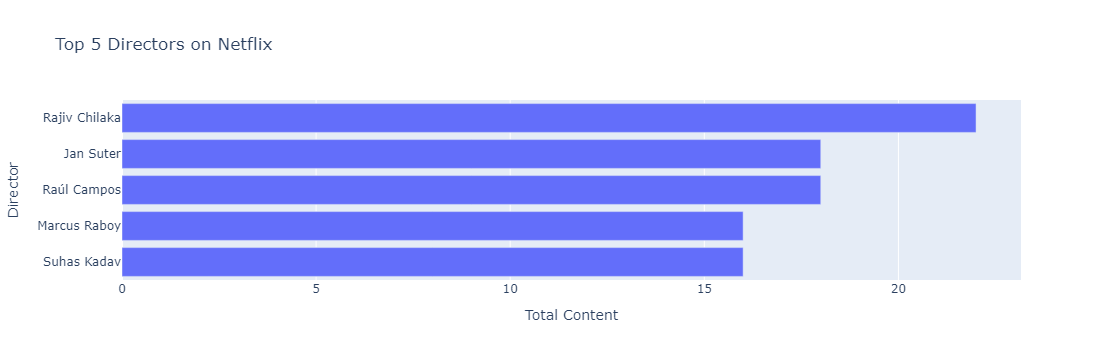

In [63]:
# Fill missing values in 'director' column with a placeholder
netflix_data['director'] = netflix_data['director'].fillna('No Director Specified')

# Split the 'director' column by commas, stack the resulting DataFrame to flatten it, and convert it to a DataFrame
filtered_directors = netflix_data['director'].str.split(',', expand=True).stack().reset_index(drop=True).to_frame(name='Director')

# Group by 'Director' and count the total content each director has worked on, excluding unspecified directors
directors = filtered_directors[filtered_directors['Director'] != 'No Director Specified'].groupby('Director').size().reset_index(name='Total Content')

# Sort directors by the total content count, get the top 5, and sort them again for a better visual order
directorsTop5 = directors.sort_values(by='Total Content', ascending=False).head().sort_values(by='Total Content')

# Create a bar chart of the top 5 directors
fig1 = px.bar(directorsTop5, x='Total Content', y='Director', title='Top 5 Directors on Netflix')
fig1.show()


## Top 5 Actors:

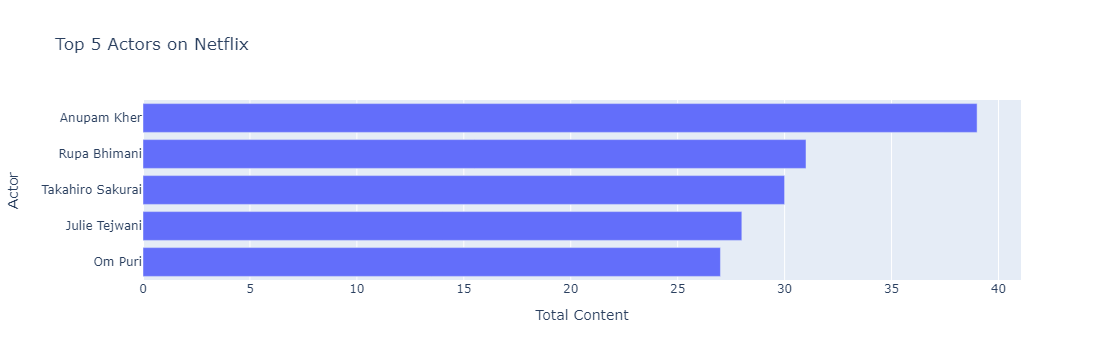

In [64]:
# Fill missing values in 'cast' column with a placeholder
netflix_data['cast'] = netflix_data['cast'].fillna('No Cast Specified')

# Split the 'cast' column by commas, stack the resulting DataFrame to flatten it, and convert it to a DataFrame
filtered_cast = netflix_data['cast'].str.split(',', expand=True).stack().reset_index(drop=True).to_frame(name='Actor')

# Group by 'Actor' and count the total content each actor has appeared in, excluding unspecified actors
actors = filtered_cast[filtered_cast['Actor'] != 'No Cast Specified'].groupby('Actor').size().reset_index(name='Total Content')

# Sort actors by the total content count, get the top 5, and sort them again for better visual order
actorsTop5 = actors.sort_values(by='Total Content', ascending=False).head().sort_values(by='Total Content')

# Create a bar chart of the top 5 actors
fig2 = px.bar(actorsTop5, x='Total Content', y='Actor', title='Top 5 Actors on Netflix')
fig2.show()


## Analyzing Content on Netflix:

#### The next key insight to uncover from this dataset is how Netflix's content production has evolved over the years, identifying patterns and trends in releases.

In [65]:
# Select the necessary columns and rename 'release_year'
df1 = netflix_data[['type', 'release_year']].rename(columns={"release_year": "Release Year"})

# Group the data by 'Release Year' and 'type', count the occurrences, and filter for years >= 2010
df2 = df1.groupby(['Release Year', 'type']).size().reset_index(name='Total Content')
df2 = df2[df2['Release Year'] >= 2010]

df2

,Release Year,type,Total Content
95,2010,Movie,154
96,2010,TV Show,40
97,2011,Movie,145
98,2011,TV Show,40
99,2012,Movie,173
100,2012,TV Show,64
101,2013,Movie,225
102,2013,TV Show,63
103,2014,Movie,264
104,2014,TV Show,88


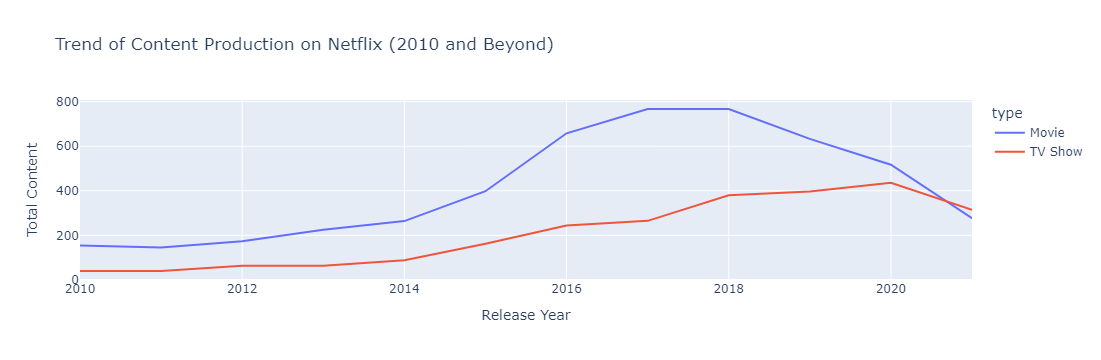

In [66]:
# Group the data by 'Release Year' and 'type', then filter for years >= 2010 and create a line plot
df2 = (netflix_data[['type', 'release_year']]
       .rename(columns={"release_year": "Release Year"})
       .groupby(['Release Year', 'type'])
       .size()
       .reset_index(name='Total Content')
       .query('`Release Year` >= 2010'))

# Generate the line plot
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type', 
               title='Trend of Content Production on Netflix (2010 and Beyond)')
fig3.show()


#### The line graph above indicates a decline in content production for both movies and shows since 2018

## Sentiment Analysis

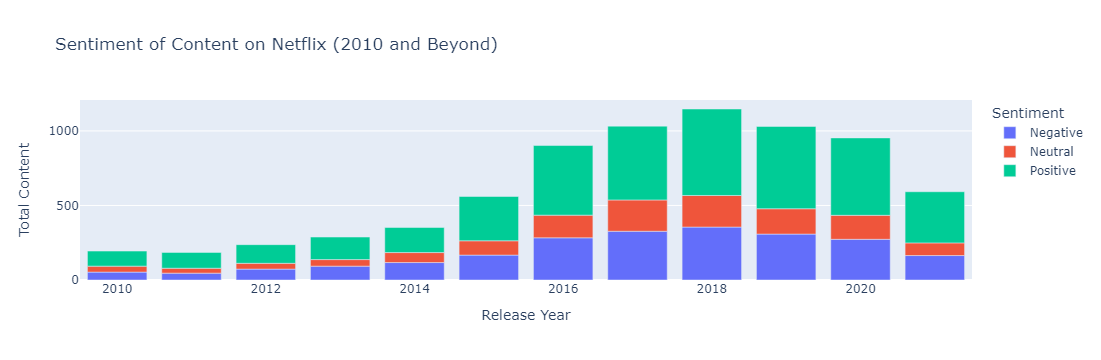

In [67]:
# Define a function to classify sentiment
def get_sentiment(description):
    polarity = TextBlob(description).sentiment.polarity
    if polarity == 0:
        return 'Neutral'
    elif polarity > 0:
        return 'Positive'
    else:
        return 'Negative'

# Select and rename necessary columns, and apply sentiment analysis
dfx = (netflix_data[['release_year', 'description']]
       .rename(columns={'release_year': 'Release Year'}))
dfx['Sentiment'] = dfx['description'].apply(get_sentiment)

# Group by Release Year and Sentiment, then filter for years >= 2010
dfx = (dfx.groupby(['Release Year', 'Sentiment'])
            .size()
            .reset_index(name='Total Content'))
dfx = dfx[dfx['Release Year'] >= 2010]

# Create a bar plot to show sentiment distribution over the years
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", 
              title="Sentiment of Content on Netflix (2010 and Beyond)")
fig4.show()

#### The graph indicates that the overall volume of positive content consistently surpasses the combined total of neutral and negative content.